<a href="https://colab.research.google.com/github/giorgioatanasov/Hospital-Readmission/blob/master/Hospital_Readmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import IPython
import numpy as np

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/178Project')
import mltools as ml
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.utils import shuffle
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as treeClassify
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 

# Data Preprocessing

In [0]:
diabetes = pd.read_csv("/content/drive/My Drive/Colab Notebooks/178Project/dataset_diabetes/diabetic_data.csv", skipinitialspace=True)
d_copy = diabetes.copy(deep=True)


d_copy['readmitted'] = d_copy['readmitted'].replace('>30', 0)
d_copy['readmitted'] = d_copy['readmitted'].replace('<30', 1)
d_copy['readmitted'] = d_copy['readmitted'].replace('NO', 2)
d_copy = d_copy.replace('?',np.nan)
output = d_copy['readmitted'].copy(deep=True)

d_copy['output'] = output
d_copy = d_copy.drop(columns=['diag_1', 'diag_2', 'diag_3', 'encounter_id', 'patient_nbr', 'readmitted'])


numeric = d_copy.select_dtypes('number').columns
categoric = d_copy.select_dtypes('object').columns

d_copy['race'] = d_copy['race'].fillna('UNKNOWN')
d_copy['payer_code'] = d_copy['payer_code'].fillna('UNKNOWN')
d_copy['medical_specialty'] = d_copy['medical_specialty'].fillna('UNKNOWN')
d_copy['weight'] = d_copy['weight'].fillna('UNKNOWN')

top_10 = ['UNKNOWN','InternalMedicine','Emergency/Trauma', 'Family/GeneralPractice', 'Cardiology','Surgery-General' , 'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist']

d_copy['med_spec'] = d_copy['medical_specialty'].copy()

d_copy.loc[-d_copy.med_spec.isin(top_10),'med_spec'] = 'Other'


le = LabelEncoder()
X_2 = d_copy[categoric].apply(le.fit_transform)
ohe = OneHotEncoder(sparse = False)
X_train_ohe = ohe.fit_transform(X_2)


catDf = pd.DataFrame(X_train_ohe) # CATEGORICAL DATA

numDf = d_copy[numeric]
numDf = numDf.drop(columns=['output']) # NUMERIC DATA

X = pd.concat([numDf,catDf], axis=1)

# XNumpy, YNumpy = ml.shuffleData(XNumpy, YNumpy)
X_train, X_valid, y_train, y_valid = train_test_split(X, d_copy['output'] , test_size=0.30, random_state=1) # 70% training and 30% test


X_trainSub = X_train[:5000]
Y_trainSub = y_train[:5000]

scaler  = StandardScaler()
scaler.fit(X_train)
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
# removes outliers within the data by normalizing it. 

Plots

# Data Representation


Text(0, 0.5, 'age')

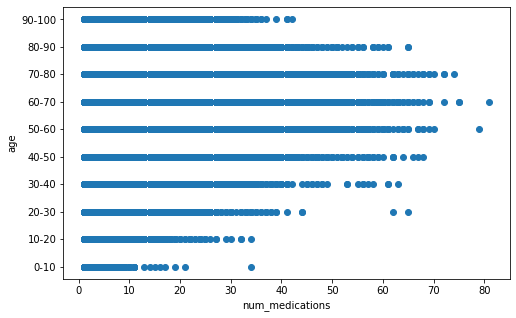

In [0]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
ax.scatter(d_copy['num_medications'], d_copy['age'])
ax.set_yticklabels(labels)
plt.xlabel('num_medications')
plt.ylabel('age')

Text(0, 0.5, 'num_lab_procedures')

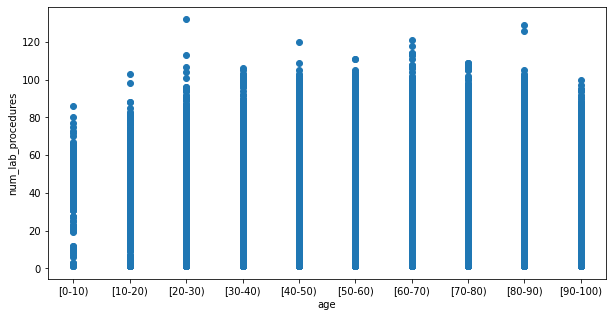

In [0]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
ax.scatter(d_copy['age'], d_copy['num_lab_procedures'])
plt.xlabel('age')
plt.ylabel('num_lab_procedures')

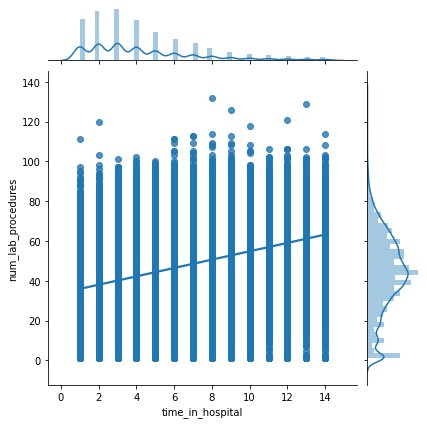

In [0]:
sns.jointplot(x = 'time_in_hospital', y = 'num_lab_procedures', data = d_copy, kind = "reg")

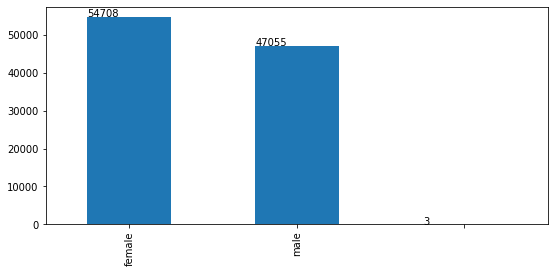

In [0]:
test = d_copy.loc[:, ('gender')]
f, ax = plt.subplots(1, 1, figsize=(9, 4))
labels = ['female', 'male']
ax = test.value_counts().plot(kind='bar')
ax.set_xticklabels(labels)

for p in ax.patches:

    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
    

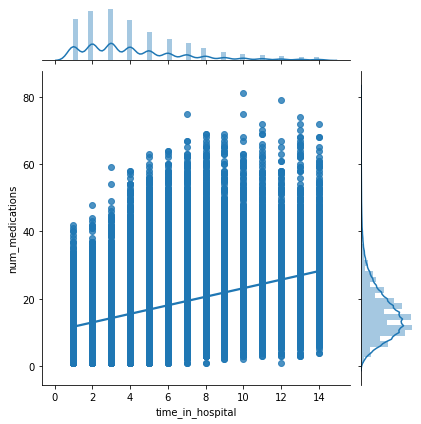

In [0]:
sns.jointplot(x = 'time_in_hospital', y = 'num_medications', data = d_copy, kind = "reg")

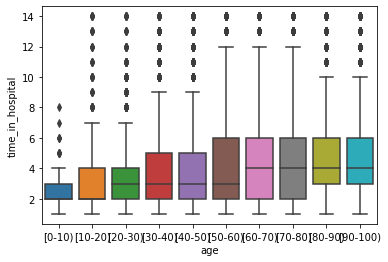

In [0]:
sns.boxplot(x = 'age', y = 'time_in_hospital', data = d_copy)

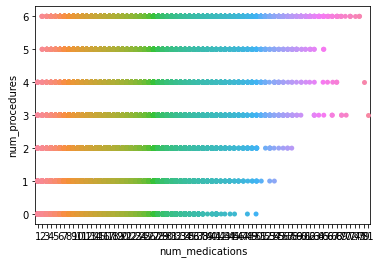

In [0]:
sns.stripplot(x = 'num_medications', y = 'num_procedures', data = d_copy)

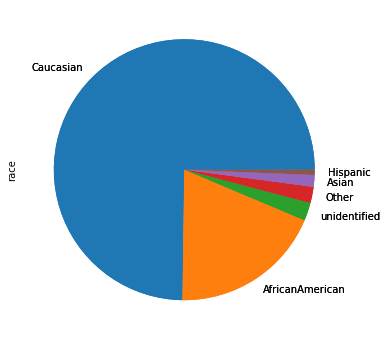

In [0]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
test = d_copy.loc[:, ('race')]
labels = ['Caucasian', 'AfricanAmerican', 'unidentified', 'Other', 'Asian', 'Hispanic']
test.value_counts().plot(kind='pie', labels=labels);
ax = test.value_counts().plot(kind='pie', labels=labels);

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

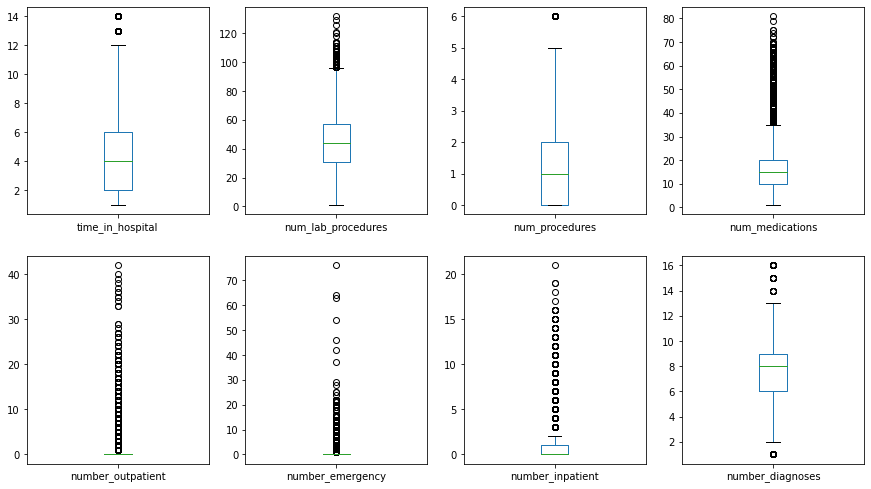

In [0]:
boxData = diabetes[[ 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient','number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']]
boxData.plot(kind='box', subplots=True, layout=(3,4),figsize=(15, 13), sharex=False, sharey=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

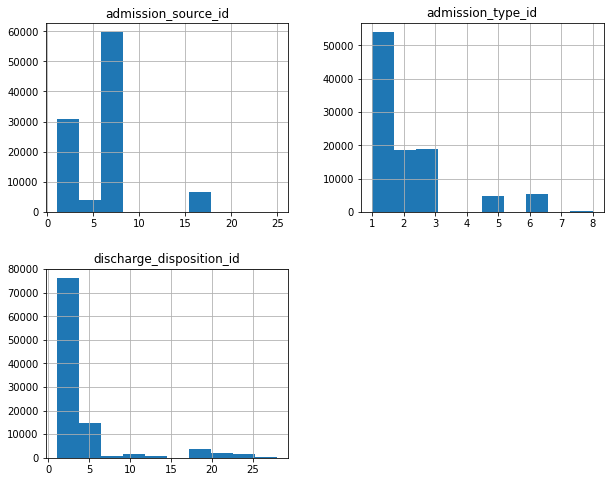

In [0]:
densityData = diabetes[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']]
densityData.hist(figsize=(10,8))
plt.show()

Another useful way to review the distribution of each attribute is to use Box and Whisker Plots or boxplots for short.

Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data)

Correlation Matrix Plot

Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If the change in opposite directions together (one goes up, one goes down), then they are negatively correlated.

You can calculate the correlation between each pair of attributes. This is called a correlation matrix. You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other.

This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

We can see that the matrix is symmetrical, i.e. the bottom left of the matrix is the same as the top right. This is useful as we can see two different views on the same data in one plot. We can also see that each variable is perfectly positively correlated with each other (as you would expected) in the diagonal line from top left to bottom right.

# Decision Trees

In [0]:
for dep in range(1, 28):
  print("Maximum Depth: " + str(dep))
  tree = treeClassify(max_depth= dep, random_state=0)
  tree.fit(X_train_tf, y_train)
  y_pred = tree.predict(X_valid_tf)
  # print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))
  print("Accuracy on training set: {:f}".format(tree.score(X_train_tf, y_train)))
  print("Accuracy on validation set: {:f}".format(tree.score(X_valid_tf, y_valid)))

Maximum Depth: 1
Accuracy on training set: 0.557443
Accuracy on validation set: 0.560203
Maximum Depth: 2
Accuracy on training set: 0.563591
Accuracy on validation set: 0.567606
Maximum Depth: 3
Accuracy on training set: 0.567452
Accuracy on validation set: 0.571241
Maximum Depth: 4
Accuracy on training set: 0.574625
Accuracy on validation set: 0.580151
Maximum Depth: 5
Accuracy on training set: 0.576282
Accuracy on validation set: 0.577989
Maximum Depth: 6
Accuracy on training set: 0.579749
Accuracy on validation set: 0.579004
Maximum Depth: 7
Accuracy on training set: 0.582908
Accuracy on validation set: 0.578611
Maximum Depth: 8
Accuracy on training set: 0.587554
Accuracy on validation set: 0.577301
Maximum Depth: 9
Accuracy on training set: 0.594433
Accuracy on validation set: 0.576580
Maximum Depth: 10
Accuracy on training set: 0.602266
Accuracy on validation set: 0.571798
Maximum Depth: 11
Accuracy on training set: 0.613187
Accuracy on validation set: 0.569604
Maximum Depth: 12
A

In [0]:
bestDepth = 7
print("Maximum Depth: " + str(bestDepth))
tree = treeClassify(max_depth= bestDepth, random_state=0)
tree.fit(X_train_tf, y_train)
y_pred = tree.predict(X_valid_tf)
print("Accuracy on training set: {:f}".format(tree.score(X_train_tf, y_train)))
print("Accuracy on validation set: {:f}".format(tree.score(X_valid_tf, y_valid)))

Maximum Depth: 7
Accuracy on training set: 0.582908
Accuracy on validation set: 0.578611


In [0]:
print(classification_report(y_valid, y_pred)) 

              precision    recall  f1-score   support

           0       0.49      0.32      0.39     10661
           1       0.41      0.02      0.04      3320
           2       0.61      0.86      0.71     16549

    accuracy                           0.58     30530
   macro avg       0.50      0.40      0.38     30530
weighted avg       0.54      0.58      0.53     30530



In [0]:
cm =  confusion_matrix(y_valid, y_pred)

print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

print("\nRecall: ", recall)
print("Precision: ", precision)
print("\nOverall measures of Recall: ", np.mean(recall))
print("Overall measures of Precision: ", np.mean(precision))

True positive =  3425
False positive =  84
False negative =  1248
True negative =  74

Recall:  [0.32126442 0.02228916 0.85600338]
Precision:  [0.4869899  0.40883978 0.60756562]

Overall measures of Recall:  0.3998523207469374
Overall measures of Precision:  0.5011317679717778


# AUC for Decision Tree

In [0]:
myDepth = np.linspace(1, 27, 27)
AUCtrainD = np.zeros(myDepth.shape[0])
AUCvalD = np.zeros(myDepth.shape[0])

for i, newDepth in enumerate(myDepth):
    tree = treeClassify(max_depth=newDepth, random_state=0)
    tree.fit(X_train, y_train)
    AUCtrainD[i] = tree.score(X_train, y_train)
    AUCvalD[i] = tree.score(X_valid, y_valid)

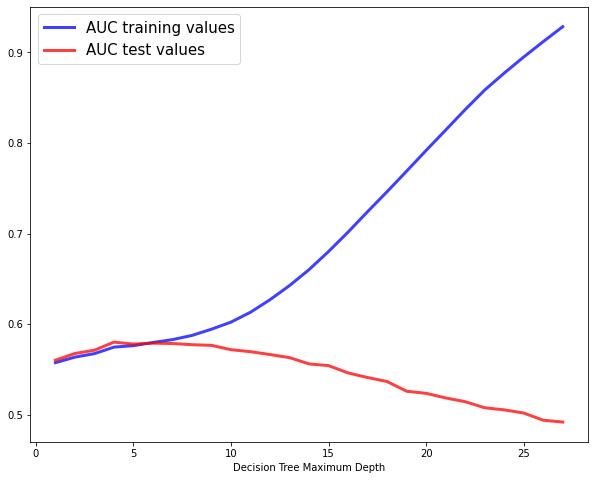

In [0]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(myDepth, AUCtrainD, lw=3, color='blue', alpha=0.75, label= 'AUC training values')
ax.plot(myDepth, AUCvalD, lw=3, color='red', alpha=0.75, label= 'AUC test values')


ax.set_xlabel("Decision Tree Maximum Depth")
ax.legend(fontsize = 15)
plt.show()

# Random Forest


In [0]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_tf,  y_train)
rf_predict = rf.predict(X_valid_tf)
print("Accuracy on training set for random forest: {:.6f}".format(rf.score(X_trainSub, Y_trainSub)))
print("Accuracy on test set for random forest: {:.6f}".format(rf.score(X_valid, y_valid)))

Accuracy on training set for random forest: 0.544800
Accuracy on test set for random forest: 0.543400


In [0]:
print(classification_report(y_valid, rf_predict)) 

              precision    recall  f1-score   support

           0       0.49      0.37      0.42     10661
           1       0.40      0.02      0.04      3320
           2       0.62      0.83      0.71     16549

    accuracy                           0.58     30530
   macro avg       0.50      0.41      0.39     30530
weighted avg       0.55      0.58      0.54     30530



In [0]:
cm =  confusion_matrix(y_valid, rf_predict)

print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

print("\nRecall: ", recall)
print("Precision: ", precision)
print("\nOverall measures of Recall: ", np.mean(recall))
print("Overall measures of Precision: ", np.mean(precision))


True positive =  3962
False positive =  75
False negative =  1331
True negative =  76

Recall:  [0.37163493 0.02289157 0.82977823]
Precision:  [0.491015   0.39583333 0.61664197]

Overall measures of Recall:  0.4081015772188617
Overall measures of Precision:  0.5011634325505747


# Gradient Boosting Classifier

In [0]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_trainSub, Y_trainSub)
    gb_clf_predict = gb_clf.predict(X_valid_tf)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.6f}".format(gb_clf.score(X_trainSub, Y_trainSub)))
    print("Accuracy score (validation): {0:.6f}".format(gb_clf.score(X_valid, y_valid)))

Learning rate:  0.05
Accuracy score (training): 0.542600
Accuracy score (validation): 0.542057
Learning rate:  0.075
Accuracy score (training): 0.542600
Accuracy score (validation): 0.542057
Learning rate:  0.1
Accuracy score (training): 0.542600
Accuracy score (validation): 0.542057
Learning rate:  0.25
Accuracy score (training): 0.544800
Accuracy score (validation): 0.542941
Learning rate:  0.5
Accuracy score (training): 0.558400
Accuracy score (validation): 0.555486
Learning rate:  0.75
Accuracy score (training): 0.575600
Accuracy score (validation): 0.562823
Learning rate:  1
Accuracy score (training): 0.579400
Accuracy score (validation): 0.566885


In [0]:
print(classification_report(y_valid, gb_clf_predict)) 

              precision    recall  f1-score   support

           0       0.35      0.89      0.50     10661
           1       0.11      0.00      0.01      3320
           2       0.56      0.12      0.19     16549

    accuracy                           0.37     30530
   macro avg       0.34      0.34      0.23     30530
weighted avg       0.44      0.37      0.28     30530



In [0]:
cm =  confusion_matrix(y_valid, gb_clf_predict)

print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

print("\nRecall: ", recall)
print("Precision: ", precision)
print("\nOverall measures of Recall: ", np.mean(recall))
print("Overall measures of Precision: ", np.mean(precision))

True positive =  9458
False positive =  45
False negative =  2967
True negative =  14

Recall:  [0.8871588  0.00421687 0.1151127 ]
Precision:  [0.35024441 0.11290323 0.55996473]

Overall measures of Recall:  0.3354961220717299
Overall measures of Precision:  0.3410374535578873


it looks like a learning rate of 1 gives us the best performance on the validation set and good performance on the training set.

# SVC

In [0]:
svc = SVC(kernel = "linear")
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_valid_tf)

KeyboardInterrupt: ignored

In [0]:
print("Accuracy on training set: {:.6f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.6f}".format(svc.score(X_valid, y_valid)))

In [0]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_valid)
svc = SVC()
svc.fit(X_train_scaled, y_train)
svc_predict = svc.predict(X_train_scaled)

In [0]:
# Transformed
print("Accuracy on training set: {:.6f}".format(svc.score(Xtr, Ytr)))
print("Accuracy on test set: {:.6f}".format(svc.score(X_test_scaled, Yva)))

In [0]:
cm =  confusion_matrix(y_valid, svc_predict)

print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

print("\nRecall: ", recall)
print("Precision: ", precision)
print("\nOverall measures of Recall: ", np.mean(recall))
print("Overall measures of Precision: ", np.mean(precision))

# GridsearchCV

In [0]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(kernel = "linear"), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train)

grid_predictions = grid.predict(X_valid_tf) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=0.538, total=128.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 128.4min remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=0.538, total=129.2min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 257.6min remaining:    0.0s


In [0]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

In [0]:
# print classification report 
print(classification_report(y_valid, grid_predictions)) 

In [0]:
cm =  confusion_matrix(y_valid, grid_predictions)

print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

print("\nRecall: ", recall)
print("Precision: ", precision)
print("\nOverall measures of Recall: ", np.mean(recall))
print("Overall measures of Precision: ", np.mean(precision))

# Neural Network (Not Used)

In [0]:
# mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=5000)
# mlp.fit(Xtr,Ytr)

# predict_train = mlp.predict(Xtr)
# predict_test = mlp.predict(Xt)

# print(confusion_matrix(Ytr,predict_train))
# print(classification_report(Ytr,predict_train, digits = 6))

# print(confusion_matrix(Yt,predict_test))
# print(classification_report(Yt,predict_test, digits = 6))

In [0]:
# plt.figure(figsize=(20, 5))
# plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
# plt.yticks(range(11), diabetes_features)
# plt.xlabel("Columns in weight matrix")
# plt.ylabel("Input feature")
# plt.colorbar()

In [0]:
# rf = RandomForestClassifier(n_estimators=100, random_state=0)
# rf.fit(X_trainSub, Y_trainSub)
# print("Accuracy on training set for random forest: {:.6f}".format(rf.score(X_train, y_train)))
# print("Accuracy on test set for random forest: {:.6f}".format(rf.score(X_valid, y_valid)))

In [0]:
# plt.figure(figsize=(20, 5))
# plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
# plt.yticks(range(11), diabetes_features)
# plt.xlabel("Columns in weight matrix")
# plt.ylabel("Input feature")
# plt.colorbar()